In [1]:
# This notebook is for exploration and data cleaning

import pandas as pd

# Load original dataset
df = pd.read_csv("../data/speed_dating_data.csv", encoding="ISO-8859-1")

# check first 5 rows
df.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check the number of rows and columns
#df.shape

# Display column names
#df.columns

# Check data types of each column
df.dtypes



iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [3]:
# Show all column names
for col in df.columns:
    print(col)



iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

In [4]:
#data cleaning 

# Select and rename relevant columns
df_clean = df[[
    'iid', 'pid', 'gender', 'age', 'age_o', 'race_o',  # Basic info
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',  # Self ratings
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',  # Partner ratings
    'expnum', 'dec', 'dec_o', 'match'  # Selectivity & outcomes
]]

df_clean.columns = [
    'participant_id', 'partner_id', 'gender', 'age', 'partner_age', 'partner_race',
    'self_attractiveness', 'self_sincerity', 'self_intelligence', 'self_fun', 'self_ambition',  
    'partner_attractiveness', 'partner_sincerity', 'partner_intelligence', 'partner_fun', 'partner_ambition',  
    'expected_matches', 'decision_self', 'decision_partner', 'match'
]

# Drop rows with missing values in self traits 
df_clean = df_clean.dropna(subset=[
    'self_attractiveness', 'self_sincerity', 'self_intelligence', 'self_fun', 'self_ambition'
])


#quick stats
print("Missing values:")
print(df_clean.isnull().sum())

print("\nDataset info:")
df_clean.info()

print("\nSummary stats:")
df_clean.describe()




Missing values:
participant_id               0
partner_id                   8
gender                       0
age                         22
partner_age                102
partner_race                71
self_attractiveness          0
self_sincerity               0
self_intelligence            0
self_fun                     0
self_ambition                0
partner_attractiveness     203
partner_sincerity          275
partner_intelligence       295
partner_fun                348
partner_ambition           709
expected_matches          6499
decision_self                0
decision_partner             0
match                        0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 8279 entries, 0 to 8377
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          8279 non-null   int64  
 1   partner_id              8271 non-null   float64
 2   gender           

,participant_id,partner_id,gender,age,partner_age,partner_race,self_attractiveness,self_sincerity,self_intelligence,self_fun,self_ambition,partner_attractiveness,partner_sincerity,partner_intelligence,partner_fun,partner_ambition,expected_matches,decision_self,decision_partner,match
count,8279.000000,8271.000000,8279.000000,8257.000000,8177.000000,8208.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8076.000000,8004.000000,7984.000000,7931.000000,7570.000000,1780.000000,8279.000000,8279.000000,8279.000000
mean,284.905303,284.999637,0.501751,26.367325,26.372264,2.757919,22.424077,17.402178,20.278333,17.453971,10.682539,6.181885,7.171289,7.369614,6.396419,6.777081,5.571348,0.420945,0.418046,0.164271
std,158.469251,158.525651,0.500027,3.565468,3.553285,1.230278,12.428307,7.049939,6.781794,6.088271,6.124888,1.951868,1.743095,1.551297,1.954484,1.792443,4.765433,0.493741,0.493268,0.370544
min,1.000000,1.000000,0.000000,18.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,157.000000,0.000000,24.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000
50%,282.000000,282.000000,1.000000,26.000000,26.000000,2.000000,20.000000,18.180000,20.000000,18.000000,10.000000,6.000000,7.000000,7.000000,7.000000,7.000000,4.000000,0.000000,0.000000,0.000000
75%,409.000000,409.000000,1.000000,28.000000,28.000000,4.000000,25.000000,20.000000,23.810000,20.000000,15.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000,0.000000
max,552.000000,552.000000,1.000000,55.000000,55.000000,6.000000,100.000000,60.000000,50.000000,50.000000,53.000000,10.500000,10.000000,10.000000,11.000000,10.000000,20.000000,1.000000,1.000000,1.000000


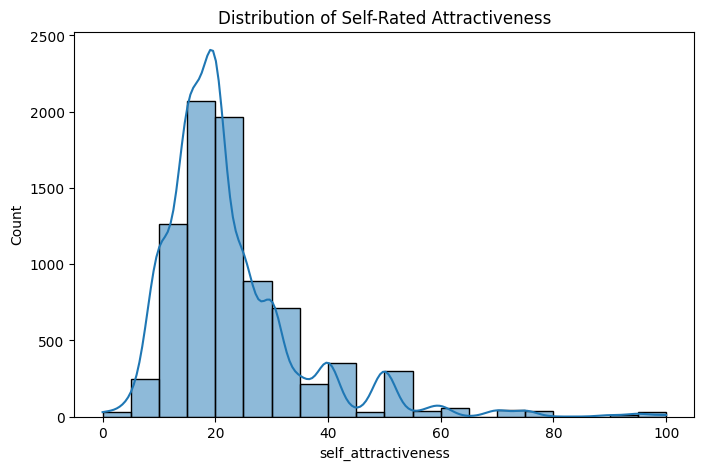

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_clean['self_attractiveness'], bins=20, kde=True)
plt.title("Distribution of Self-Rated Attractiveness")
plt.show()


In [6]:
# Save cleaned data to CSV
df_clean.to_csv("../data/cleaned_speed_dating_data.csv", index=False)


/var/folders/x2/0f1y8lh168x1wdchc9dc03sr0000gn/T/ipykernel_56352/181506214.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ambition_group', y='decision_self', data=df_clean, estimator=np.mean, palette='Blues')
/var/folders/x2/0f1y8lh168x1wdchc9dc03sr0000gn/T/ipykernel_56352/181506214.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y * 100)}%' for y in plt.gca().get_yticks()])
/var/folders/x2/0f1y8lh168x1wdchc9dc03sr0000gn/T/ipykernel_56352/181506214.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fun_group', y='decision_self', data=df_clean, estimator=n

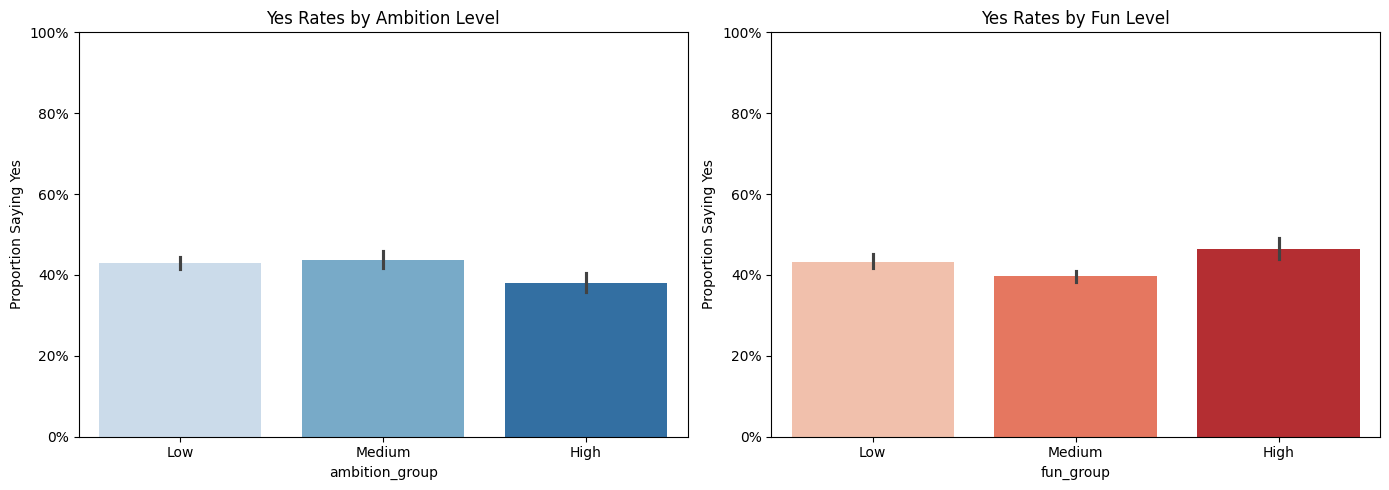

In [7]:
df = pd.read_csv("../data/cleaned_speed_dating_data.csv")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create groups based on quantiles
df_clean['ambition_group'] = pd.qcut(df_clean['self_ambition'], q=3, labels=['Low', 'Medium', 'High'])
df_clean['fun_group'] = pd.qcut(df_clean['self_fun'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(14, 5))

# Plot 1: Ambition vs. Yes Rate
plt.subplot(1, 2, 1)
sns.barplot(x='ambition_group', y='decision_self', data=df_clean, estimator=np.mean, palette='Blues')
plt.title('Yes Rates by Ambition Level')
plt.ylabel('Proportion Saying Yes')
plt.ylim(0, 1)
plt.gca().set_yticklabels([f'{int(y * 100)}%' for y in plt.gca().get_yticks()])

# Plot 2: Fun vs. Yes Rate
plt.subplot(1, 2, 2)
sns.barplot(x='fun_group', y='decision_self', data=df_clean, estimator=np.mean, palette='Reds')
plt.title('Yes Rates by Fun Level')
plt.ylabel('Proportion Saying Yes')
plt.ylim(0, 1)
plt.gca().set_yticklabels([f'{int(y * 100)}%' for y in plt.gca().get_yticks()])

plt.tight_layout()
plt.show()



In [8]:
# -----------------------------------------------
# Perform independent t-tests to check if self-perceived traits
# (fun, ambition, sincerity, attractiveness, intelligence)
# significantly affect participants' yes-rate (decision_self).
# 
# A low p-value (< 0.05) suggests a significant difference 
# between Low and High groups for that trait.
# -----------------------------------------------

import scipy.stats as stats

# Define trait columns to test
traits = ['self_fun', 'self_ambition', 'self_sincerity', 'self_attractiveness', 'self_intelligence']

# Function to perform t-test for a trait
def t_test_selectivity(df, trait):
    # Split participants into Low and High based on median
    median_value = df[trait].median()
    low_group = df[df[trait] <= median_value]['decision_self']
    high_group = df[df[trait] > median_value]['decision_self']

    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(low_group, high_group, equal_var=False)

    print(f"Trait: {trait}")
    print(f"  Low group yes-rate mean: {low_group.mean():.3f}")
    print(f"  High group yes-rate mean: {high_group.mean():.3f}")
    print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
    print('  --> Significant difference!' if p_value < 0.05 else '  --> Not significant.')
    print('-'*50)

# Run t-tests for each trait
for trait in traits:
    t_test_selectivity(df, trait)


# Fun and Ambition: No strong effect on selectivity (people rated low or high in fun/ambition said "yes" at about the same rate).
# Sincerity, Attractiveness, Intelligence: Significant effects!
# People who rated themselves as more sincere, attractive, or intelligent had different yes-rates compared to those who rated themselves lower.
# (self-perceptions of sincerity, attractiveness, and intelligence are linked to selectivity in dating.")



Trait: self_fun
  Low group yes-rate mean: 0.427
  High group yes-rate mean: 0.414
  T-statistic: 1.188, P-value: 0.2349
  --> Not significant.
--------------------------------------------------
Trait: self_ambition
  Low group yes-rate mean: 0.429
  High group yes-rate mean: 0.410
  T-statistic: 1.739, P-value: 0.0822
  --> Not significant.
--------------------------------------------------
Trait: self_sincerity
  Low group yes-rate mean: 0.409
  High group yes-rate mean: 0.433
  T-statistic: -2.214, P-value: 0.0269
  --> Significant difference!
--------------------------------------------------
Trait: self_attractiveness
  Low group yes-rate mean: 0.431
  High group yes-rate mean: 0.403
  T-statistic: 2.481, P-value: 0.0131
  --> Significant difference!
--------------------------------------------------
Trait: self_intelligence
  Low group yes-rate mean: 0.407
  High group yes-rate mean: 0.452
  T-statistic: -3.761, P-value: 0.0002
  --> Significant difference!
----------------------

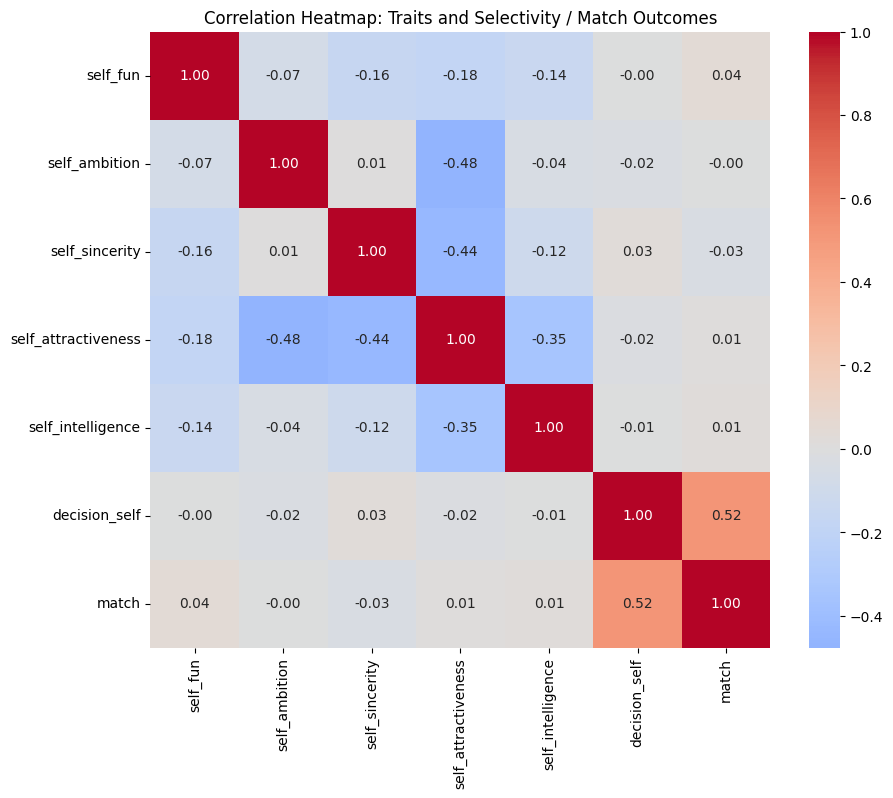

In [9]:

# Select traits + decision_self + match
correlation_features = traits + ['decision_self', 'match']

# Compute correlation matrix
corr_matrix = df[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap: Traits and Selectivity / Match Outcomes')
plt.show()

# The correlation heatmap revealed that participants' yes-decisions were strongly correlated with match outcomes (r = 0.52).
# Self-perceptions of ambition and sincerity were moderately negatively correlated with self-perceived attractiveness, suggesting interesting dynamics between self-viewed personality and appearance traits.
# Fun and intelligence ratings showed little to no direct correlation with dating selectivity or match success."


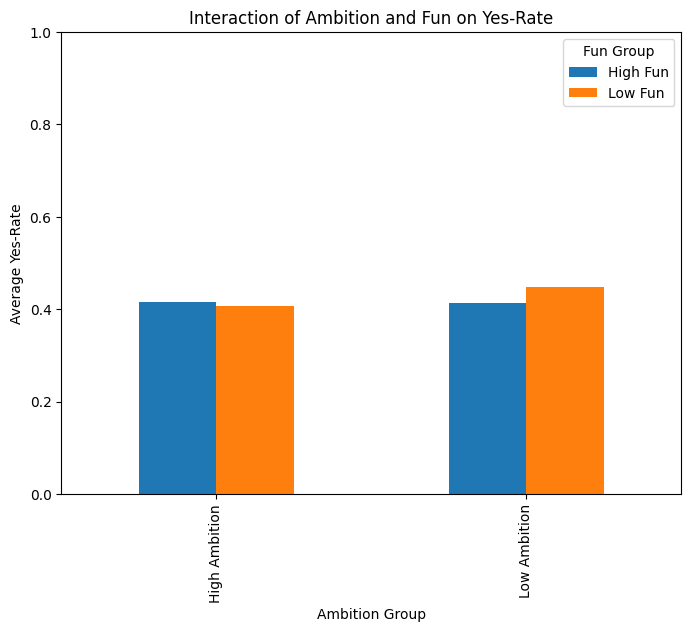

In [10]:

# Create bins for traits
df['ambition_group'] = np.where(df['self_ambition'] > df['self_ambition'].median(), 'High Ambition', 'Low Ambition')
df['fun_group'] = np.where(df['self_fun'] > df['self_fun'].median(), 'High Fun', 'Low Fun')

# Group by both traits
interaction = df.groupby(['ambition_group', 'fun_group'])['decision_self'].mean().unstack()

# Plot
interaction.plot(kind='bar', figsize=(8,6))
plt.title('Interaction of Ambition and Fun on Yes-Rate')
plt.ylabel('Average Yes-Rate')
plt.xlabel('Ambition Group')
plt.ylim(0, 1)
plt.legend(title='Fun Group')
plt.show()

# The interaction plot shows that among participants with lower ambition, those who also rated themselves as less fun exhibited a slightly higher yes-rate. In contrast, among highly ambitious participants, fun levels did not notably affect dating selectivity.


In [11]:
#divide in selectivity group

# 1. Calculate yes rate
yes_rate = df.groupby('participant_id')['decision_self'].mean().reset_index()
yes_rate.rename(columns={'decision_self': 'yes_rate'}, inplace=True)

# 2. Merge safely
df = df.drop(columns=['yes_rate'], errors='ignore')  # Drop old yes_rate if exists
df = df.merge(yes_rate, on='participant_id', how='left')

# 3. Create selectivity groups (high picky = low yes rate)
df['selectivity_group'] = pd.qcut(df['yes_rate'], q=3, labels=['High Selectivity', 'Medium Selectivity', 'Low Selectivity'])

# 4. Check result
print(df[['participant_id', 'yes_rate', 'selectivity_group']].drop_duplicates().sort_values('yes_rate'))


      participant_id  yes_rate selectivity_group
488               40       0.0  High Selectivity
7531             519       0.0  High Selectivity
7707             527       0.0  High Selectivity
100               11       0.0  High Selectivity
3824             267       0.0  High Selectivity
...              ...       ...               ...
7305             508       1.0   Low Selectivity
1368              98       1.0   Low Selectivity
564               44       1.0   Low Selectivity
80                 9       1.0   Low Selectivity
70                 8       1.0   Low Selectivity

[542 rows x 3 columns]


/var/folders/x2/0f1y8lh168x1wdchc9dc03sr0000gn/T/ipykernel_56352/1298254171.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


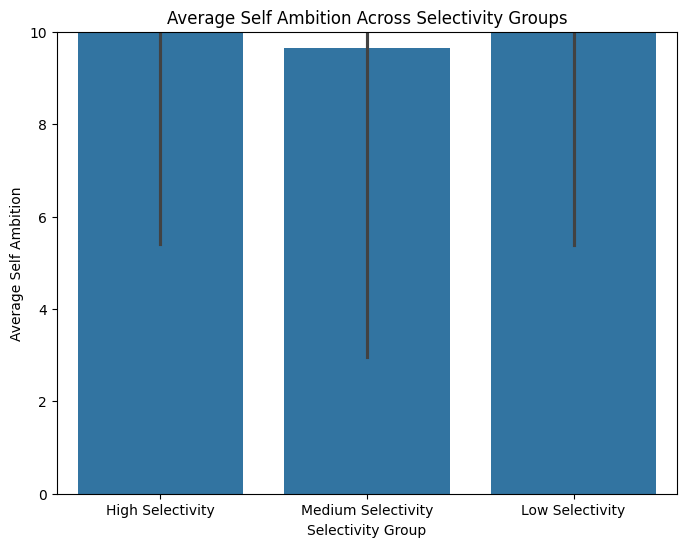

/var/folders/x2/0f1y8lh168x1wdchc9dc03sr0000gn/T/ipykernel_56352/1298254171.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


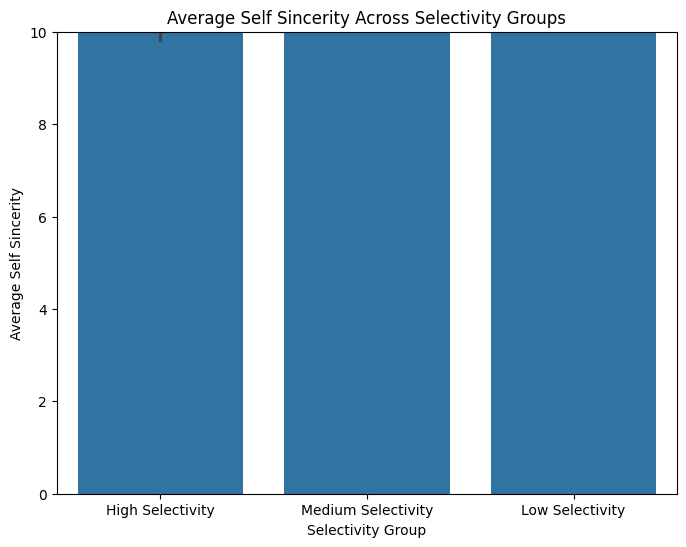

/var/folders/x2/0f1y8lh168x1wdchc9dc03sr0000gn/T/ipykernel_56352/1298254171.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


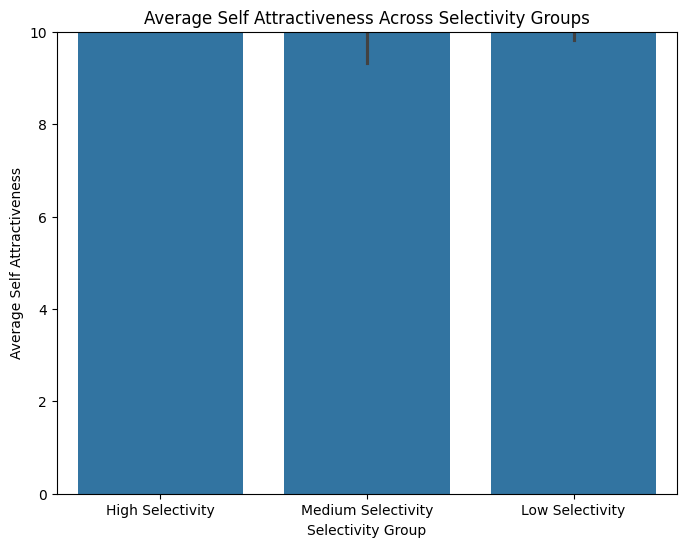

/var/folders/x2/0f1y8lh168x1wdchc9dc03sr0000gn/T/ipykernel_56352/1298254171.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


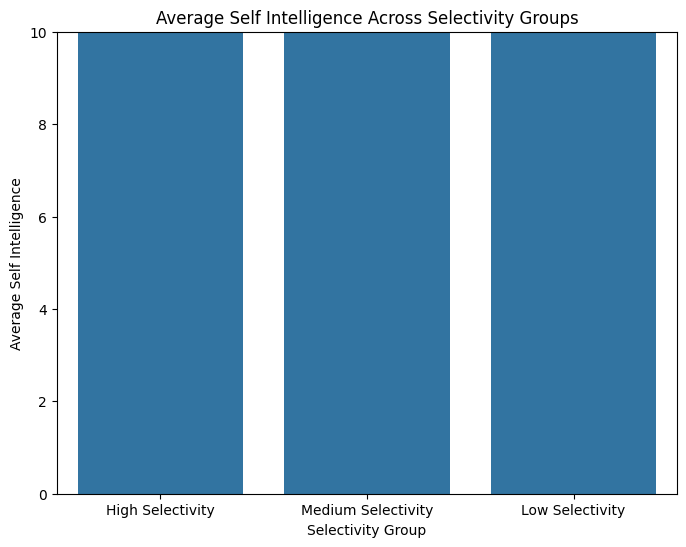

In [12]:

# While self-reported fun ratings were uniformly high across all
# selectivity groups, traits like ambition showed greater variability,
# with high selectivity participants tending to report slightly higher
# ambition levels than less selective participants

import seaborn as sns
import matplotlib.pyplot as plt

# List of traits you want to plot
traits = ['self_ambition', 'self_sincerity', 'self_attractiveness', 'self_intelligence']

# Loop over traits
for trait in traits:
    plt.figure(figsize=(8,6))
    sns.barplot(
        x='selectivity_group',
        y=trait,
        data=df,
        order=['High Selectivity', 'Medium Selectivity', 'Low Selectivity'],
        ci='sd'  # show standard deviation error bars
    )
    plt.title(f'Average {trait.replace("_", " ").title()} Across Selectivity Groups')
    plt.ylabel(f'Average {trait.replace("_", " ").title()}')
    plt.xlabel('Selectivity Group')
    plt.ylim(0, 10)  # Assuming 0–10 rating scale
    plt.show()


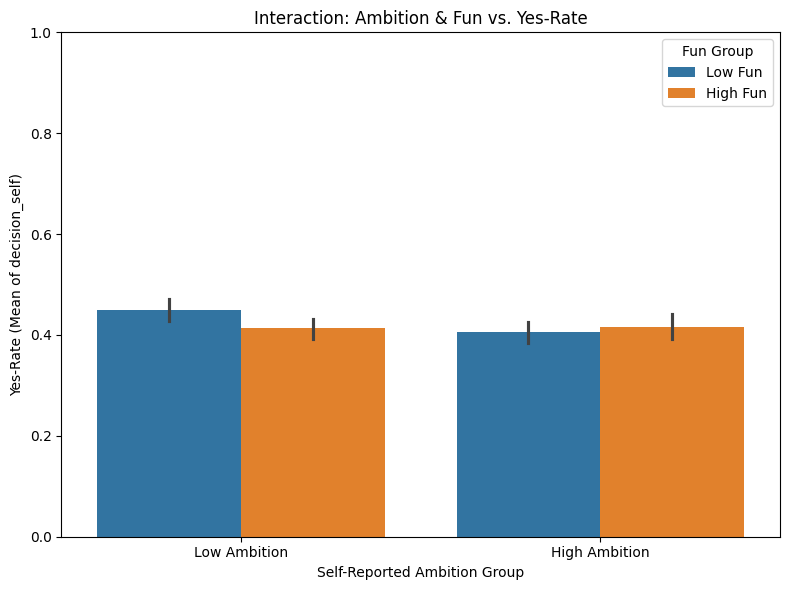

In [13]:
# Interaction Plot: Ambition × Fun vs. Yes-Rate
# Slightly unexpected — Low Ambition + Low Fun showed the highest yes-rate.
# No strong interaction overall, but this pattern might be useful for presentation discussion.
# Adds behavioral depth even if not statistically significant.

# Create binary trait groups
df['ambition_group'] = pd.qcut(df['self_ambition'], q=2, labels=['Low Ambition', 'High Ambition'])
df['fun_group'] = pd.qcut(df['self_fun'], q=2, labels=['Low Fun', 'High Fun'])

# Plot interaction
plt.figure(figsize=(8,6))
sns.barplot(
    x='ambition_group',
    y='decision_self',
    hue='fun_group',
    data=df,
    estimator='mean'
)
plt.title('Interaction: Ambition & Fun vs. Yes-Rate')
plt.ylabel('Yes-Rate (Mean of decision_self)')
plt.xlabel('Self-Reported Ambition Group')
plt.ylim(0, 1)
plt.legend(title='Fun Group')
plt.tight_layout()
plt.show()


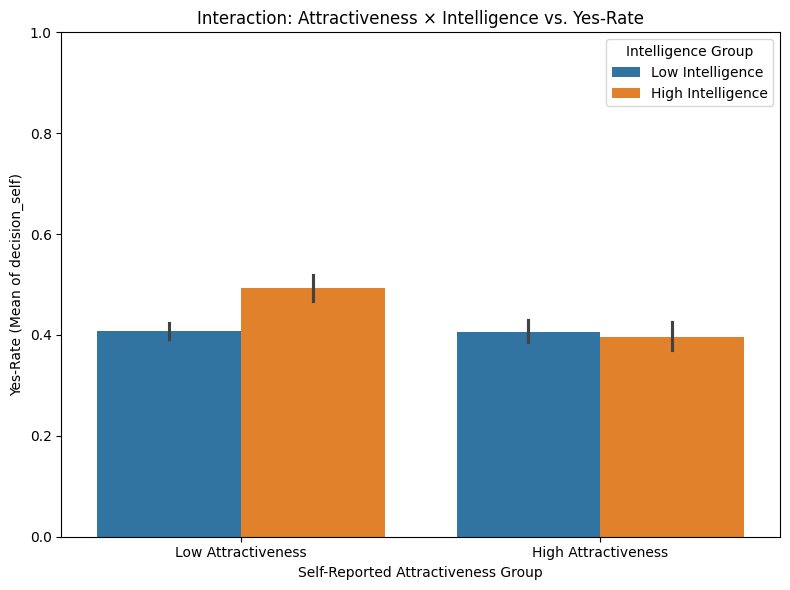

In [14]:
# Interaction Plot: Attractiveness × Intelligence vs. Yes-Rate
# Somewhat surprising: Highest yes-rate came from Low Attractiveness + High Intelligence.
# Could suggest self-perceived intellect compensates for self-perceived appearance.
# Interesting behavioral insight for discussion or slides.


 # Create groups for both traits
df['attr_group'] = pd.qcut(df['self_attractiveness'], q=2, labels=['Low Attractiveness', 'High Attractiveness'])
df['intel_group'] = pd.qcut(df['self_intelligence'], q=2, labels=['Low Intelligence', 'High Intelligence'])

# Plot interaction
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(
    x='attr_group',
    y='decision_self',
    hue='intel_group',
    data=df,
    estimator='mean'
)
plt.title('Interaction: Attractiveness × Intelligence vs. Yes-Rate')
plt.ylabel('Yes-Rate (Mean of decision_self)')
plt.xlabel('Self-Reported Attractiveness Group')
plt.ylim(0, 1)
plt.legend(title='Intelligence Group')
plt.tight_layout()
plt.show()


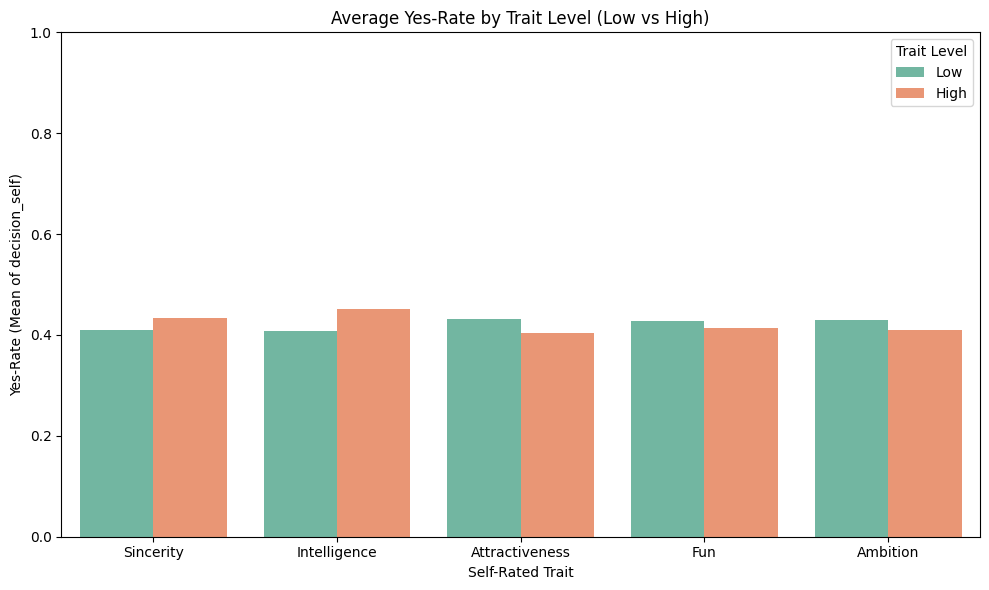

In [16]:
# Trait Scorecard Summary:
# Most self-rated traits show only small differences in yes-rates between low and high groups.
# Intelligence and sincerity had the clearest (but still modest) positive effects.
# Attractiveness, ambition, and fun showed slightly lower yes-rates in their "high" groups.
# Suggests that no single trait strongly drives dating decisions — self-perception alone may not predict openness.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare traits
traits = ['self_sincerity', 'self_intelligence', 'self_attractiveness', 'self_fun', 'self_ambition']
trait_labels = {
    'self_sincerity': 'Sincerity',
    'self_intelligence': 'Intelligence',
    'self_attractiveness': 'Attractiveness',
    'self_fun': 'Fun',
    'self_ambition': 'Ambition'
}

# Make long-form dataframe for plotting
rows = []
for trait in traits:
    df[trait + '_group'] = pd.qcut(df[trait], q=2, labels=['Low', 'High'])
    for group in ['Low', 'High']:
        mean_yes = df[df[trait + '_group'] == group]['decision_self'].mean()
        rows.append({
            'Trait': trait_labels[trait],
            'Group': group,
            'YesRate': mean_yes
        })

plot_df = pd.DataFrame(rows)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Trait', y='YesRate', hue='Group', palette='Set2')
plt.title('Average Yes-Rate by Trait Level (Low vs High)')
plt.ylabel('Yes-Rate (Mean of decision_self)')
plt.xlabel('Self-Rated Trait')
plt.ylim(0, 1)
plt.legend(title='Trait Level')
plt.tight_layout()
plt.show()

